In [1]:
import warnings
import time
import sys
import datetime
import matplotlib.pyplot as plt
import japanize_matplotlib

import numpy as np
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
# 実行完了時に音鳴らす
import winsound

frequency = 400  # Hz
duration = 700    # milliseconds
winsound.Beep(frequency, duration)

In [2]:
new_transactions = pd.read_csv('../Kaggle-data/new_merchant_transactions.csv')
                              #  ,parse_dates=['purchase_date'])

historical_transactions = pd.read_csv('../Kaggle-data/historical_transactions.csv')
                                      # ,parse_dates=['purchase_date'])
merchants = pd.read_csv('../Kaggle-data/merchants.csv')
train = pd.read_csv('../Kaggle-data/train.csv')
test = pd.read_csv('../Kaggle-data/test.csv')
winsound.Beep(frequency, duration)

In [6]:
print(new_transactions.purchase_amount.mean())
print(new_transactions.purchase_amount.std())
print(new_transactions.purchase_amount.max())
print(new_transactions.purchase_amount.min())

-0.5509689991954536
0.6940042578499669
263.15749789
-0.74689277


In [4]:
new_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [5]:
new_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,2018-03-17 18:10:41,1.0,9,15


In [6]:
new_transactions.category_1.value_counts()

category_1
N    1899935
Y      63096
Name: count, dtype: int64

In [7]:
new_transactions.category_3.value_counts()

category_3
A    922244
B    836178
C    148687
Name: count, dtype: int64

In [8]:
new_transactions.month_lag.value_counts()

month_lag
1    1027617
2     935414
Name: count, dtype: int64

In [9]:
historical_transactions.shape

(29112361, 14)

In [10]:
print(train.shape)
print(test.shape)

(201917, 6)
(123623, 5)


In [11]:
new_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


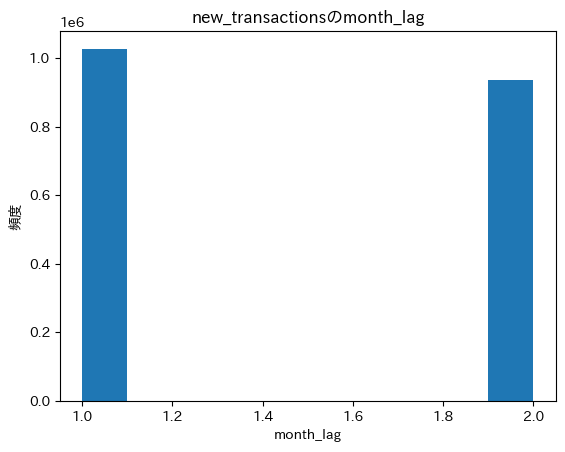

In [12]:
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.hist(new_transactions['month_lag'])
plt.title('new_transactionsのmonth_lag')
plt.xlabel('month_lag')
plt.ylabel('頻度')
plt.show()

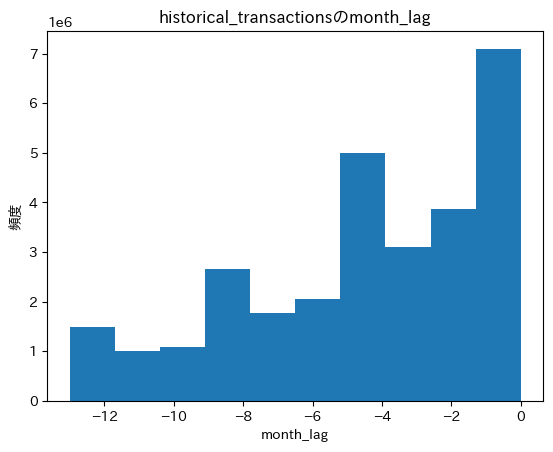

In [13]:
plt.hist(historical_transactions['month_lag'])
plt.title('historical_transactionsのmonth_lag')
plt.xlabel('month_lag')
plt.ylabel('頻度')
plt.show()


In [14]:
historical_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [15]:
historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [16]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [17]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [18]:
train.describe()
# train['feature_3'].unique()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


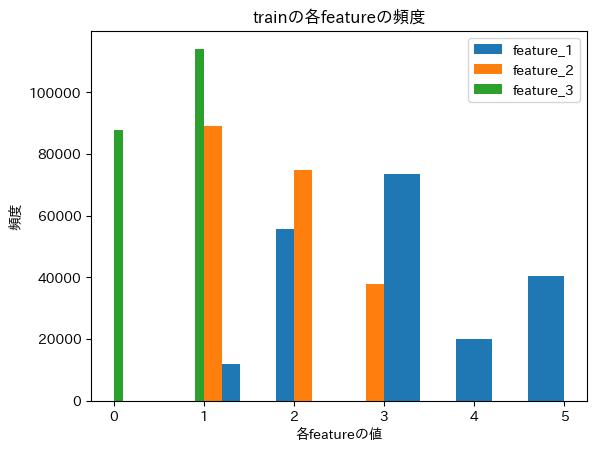

In [19]:
import matplotlib.pyplot as plt
plt.hist(train['feature_1'])
plt.hist(train['feature_2'])
plt.hist(train['feature_3'])
plt.title('trainの各featureの頻度')
plt.xlabel('各featureの値')
plt.ylabel('頻度')
plt.legend(train[['feature_1', 'feature_2', 'feature_3']])
plt.show()

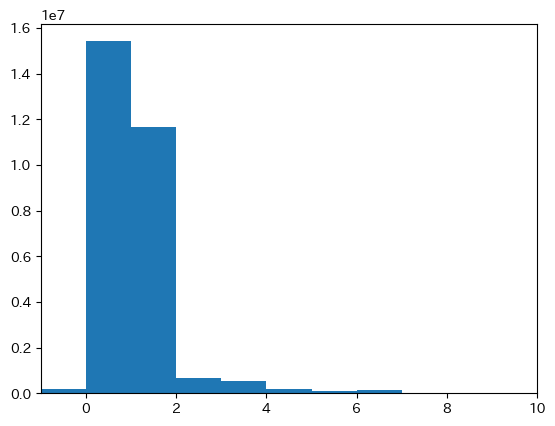

In [20]:
plt.hist(historical_transactions['installments'], bins=1000)
plt.xlim(-1, 10)
plt.show()

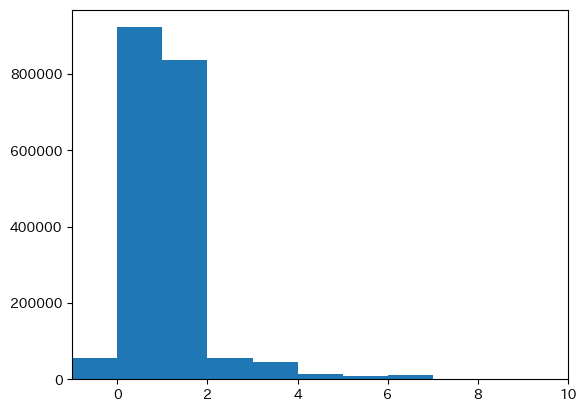

In [21]:
plt.hist(new_transactions['installments'], bins=1000)
plt.xlim(-1, 10)
plt.show()

In [22]:
print(len(historical_transactions.query('installments == -1')))
print(len(new_transactions.query('installments == -1')))

178159
55922


In [23]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [24]:
df_combined = pd.merge(train[['first_active_month', 'card_id']], historical_transactions[['card_id', 'purchase_date', 'month_lag']], on='card_id', how='inner')
df_combined.head(10)

,first_active_month,card_id,purchase_date,month_lag
0,2017-06,C_ID_92a2005557,2017-11-25 16:37:11,-3
1,2017-06,C_ID_92a2005557,2017-07-16 12:21:00,-7
2,2017-06,C_ID_92a2005557,2017-08-10 21:01:16,-6
3,2017-06,C_ID_92a2005557,2017-12-15 12:06:58,-2
4,2017-06,C_ID_92a2005557,2017-07-08 15:13:18,-7
5,2017-06,C_ID_92a2005557,2017-08-13 13:43:07,-6
6,2017-06,C_ID_92a2005557,2018-01-27 06:44:29,-1
7,2017-06,C_ID_92a2005557,2017-07-01 09:02:20,-7
8,2017-06,C_ID_92a2005557,2017-09-02 23:05:56,-5
9,2017-06,C_ID_92a2005557,2017-07-27 08:17:48,-7


In [25]:
df_combined_all = pd.merge(train, historical_transactions, on='card_id', how='inner')
df_combined_all.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
2,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,683,M_ID_36f9e41993,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
3,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,309,M_ID_b790230ee9,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
4,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37
5,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,560,M_ID_b3c49066d8,-6,-0.662158,2017-08-13 13:43:07,1.0,9,34
6,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,560,M_ID_b3c49066d8,-1,-0.665614,2018-01-27 06:44:29,1.0,9,34
7,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,560,M_ID_b3c49066d8,-7,-0.727944,2017-07-01 09:02:20,1.0,9,34
8,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,80,M_ID_c124c4467a,-5,-0.620986,2017-09-02 23:05:56,1.0,9,37
9,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Y,69,N,0,A,560,M_ID_1a81c358a3,-7,-0.722114,2017-07-27 08:17:48,1.0,9,34


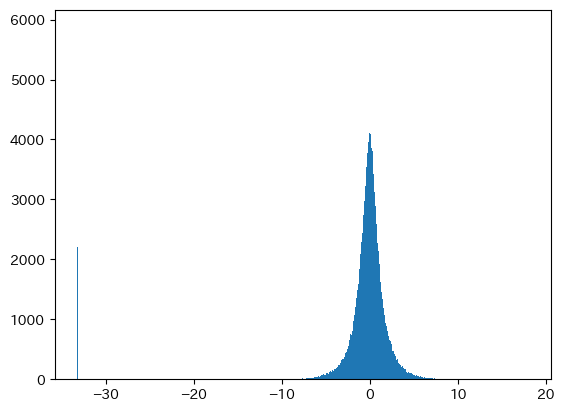

In [26]:
plt.hist(train['target'], bins='auto')
plt.show()
# target < -30未満は異常値？

In [38]:
# target < -30の数
print(train.query('target < -30').target.count())

# target < -30の割合
print(len(train.query('target < -30'))/len(train))

# 異常値は全体の1%と判明

2207
0.010930233709890698


In [39]:
train.query('target < -30')['target'].unique()
# 異常値の値は-33.21928905のみ

array([-33.21928095])

In [40]:
train.query('target < -30')

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.219281
...,...,...,...,...,...,...
201169,2016-07,C_ID_e34ea29439,2,2,0,-33.219281
201262,2017-10,C_ID_081082a629,5,2,1,-33.219281
201368,2016-08,C_ID_6f61bed11c,3,3,1,-33.219281
201519,2017-05,C_ID_d6c86b18cd,2,1,0,-33.219281


In [27]:
historical_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


In [41]:
print(len(historical_transactions.query('category_2 == 1.0')['city_id'].unique()))
print(len(historical_transactions.query('category_2 == 4.0')['city_id'].unique()))

165
30


In [42]:
historical_transactions['subsector_id'].unique()

array([37, 16, 34, 41, 29,  7, 33,  2, 36, 25, 15, 19, 10, 30, 18,  8, 27,
        1, 39, 32, 22, 20, 21,  9, 17, 38, 12, 26, 31, 13, 35,  5, 23,  3,
        4, 14, 24, 40, 11, -1, 28])

In [3]:
merchants.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [7]:
merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


In [8]:
merchants.shape

(334696, 22)

In [9]:
merchants.describe()

C:\Users\toshiki.kawai.sx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\toshiki.kawai.sx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\toshiki.kawai.sx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


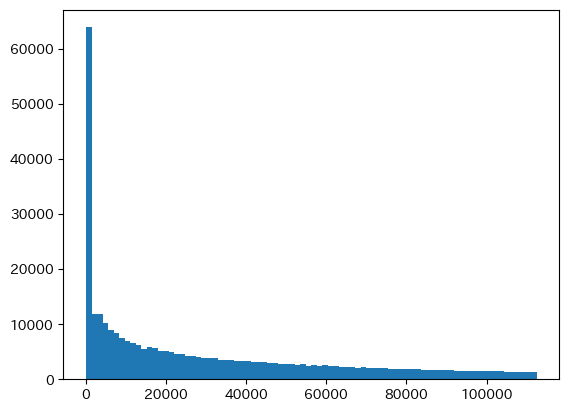

In [15]:
plt.hist(merchants['merchant_group_id'], bins='auto')
plt.show()

KeyboardInterrupt: 

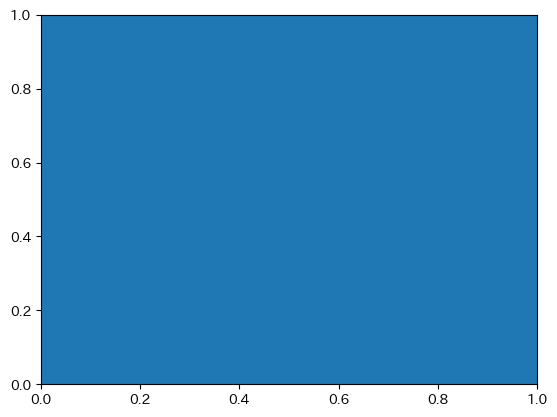